In [135]:
%%html
<style>
    /* identifier les reponse aux questions */
    .comment {
        color:blue;
    }
    
    /* utilitaire pour faire des colonnes */
    .column {
        float:left;
        width:50%;
    }
</style>

# Dataset
[Plant Village](https://data.mendeley.com/datasets/tywbtsjrjv/1)

## Description

In this data-set, 39 different classes of plant leaf and background images are available. The data-set containing 61,486 images. We used six different augmentation techniques for increasing the data-set size. The techniques are image flipping, Gamma correction, noise injection, PCA color augmentation, rotation, and Scaling.

The classes are: 

<br>

<div class="column">

1. Apple_scab
2. Apple_black_rot
3. Apple_cedar_apple_rust
4. Apple_healthy
5. Background_without_leaves
6. Blueberry_healthy
7. Cherry_powdery_mildew
8. Cherry_healthy
9. Corn_gray_leaf_spot
10. Corn_common_rust
11. Corn_northern_leaf_blight
12. Corn_healthy
13. Grape_black_rot
14. Grape_black_measles
15. Grape_leaf_blight
16. Grape_healthy
17. Orange_haunglongbing
18. Peach_bacterial_spot
19. Peach_healthy
20. Pepper_bacterial_spot

</div>

<div class="column">
    
21. Pepper_healthy
22. Potato_early_blight
23. Potato_healthy
24. Potato_late_blight
25. Raspberry_healthy
26. Soybean_healthy
27. Squash_powdery_mildew
28. Strawberry_healthy
29. Strawberry_leaf_scorch
30. Tomato_bacterial_spot
31. Tomato_early_blight
32. Tomato_healthy
33. Tomato_late_blight
34. Tomato_leaf_mold
35. Tomato_septoria_leaf_spot
36. Tomato_spider_mites_two-spotted_spider_mite
37. Tomato_target_spot
38. Tomato_mosaic_virus
39. Tomato_yellow_leaf_curl_virus
    
</div>

In [149]:
%matplotlib inline

#
# import utilitaires
#
import cv2
import numpy as np
import pandas as pd
import random
import seaborn as sns

from dataset_helpers import dataset_load_config, dataset_load
from jupyter_helpers import display_html
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

# make random deterministic
random.seed(42)

In [145]:
#
# retreive dataset PlantVillage
# does necessary work to get final .csv
# some preliminary cleanup is done
#
dataset_config = dataset_load_config("PlantVillage_Config.json")
if dataset_config is None:
    display_html(f"<b>Invalid dataset config</b>")

plantvillage = dataset_load(dataset_config)
if plantvillage is None:
    display_html(f"<b>Invalid dataset</b>")

# Exploration

In [138]:
display_html(f"<b>{dataset_config.preprocess_path}</b> - data {plantvillage.shape}")
display(plantvillage.head(5))

,label,image_path,species,disease,image_width,image_height,thumbnail_path
0,Apple_scab,dataset\Apple___Apple_scab\image (1).JPG,Apple,Apple_scab,256,256,dataset\.thumbnails\Apple___Apple_scab\image (...
1,Apple_scab,dataset\Apple___Apple_scab\image (10).JPG,Apple,Apple_scab,256,256,dataset\.thumbnails\Apple___Apple_scab\image (...
2,Apple_scab,dataset\Apple___Apple_scab\image (100).JPG,Apple,Apple_scab,256,256,dataset\.thumbnails\Apple___Apple_scab\image (...
3,Apple_scab,dataset\Apple___Apple_scab\image (1000).JPG,Apple,Apple_scab,256,256,dataset\.thumbnails\Apple___Apple_scab\image (...
4,Apple_scab,dataset\Apple___Apple_scab\image (101).JPG,Apple,Apple_scab,256,256,dataset\.thumbnails\Apple___Apple_scab\image (...


In [139]:
display_html(f"<b>{dataset_config.preprocess_path}</b> - info")
plantvillage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60343 entries, 0 to 60342
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   label           60343 non-null  object
 1   image_path      60343 non-null  object
 2   species         60343 non-null  object
 3   disease         60343 non-null  object
 4   image_width     60343 non-null  int32 
 5   image_height    60343 non-null  int32 
 6   thumbnail_path  60343 non-null  object
dtypes: int32(2), object(5)
memory usage: 2.8+ MB


In [140]:
species = plantvillage["species"].unique()
species.sort()
display_html(f"<b>species</b> - count: {species.size}")
display(list(species))

['Apple',
 'Blueberry',
 'Cherry',
 'Corn',
 'Grape',
 'Orange',
 'Peach',
 'Pepper_bell',
 'Potato',
 'Raspberry',
 'Soybean',
 'Squash',
 'Strawberry',
 'Tomato']

In [141]:
labels = plantvillage["label"].unique()
labels.sort()
display_html(f"<b>label</b> - count: {len(labels)}")
display(list(labels))

['Apple_Black_rot',
 'Apple_Cedar_apple_rust',
 'Apple_healthy',
 'Apple_scab',
 'Blueberry_healthy',
 'Cherry_Powdery_mildew',
 'Cherry_healthy',
 'Corn_Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_Common_rust',
 'Corn_Northern_Leaf_Blight',
 'Corn_healthy',
 'Grape_Black_rot',
 'Grape_Esca_(Black_Measles)',
 'Grape_Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape_healthy',
 'Orange_Haunglongbing_(Citrus_greening)',
 'Peach_Bacterial_spot',
 'Peach_healthy',
 'Pepper_bell_Bacterial_spot',
 'Pepper_bell_healthy',
 'Potato_Early_blight',
 'Potato_Late_blight',
 'Potato_healthy',
 'Raspberry_healthy',
 'Soybean_healthy',
 'Squash_Powdery_mildew',
 'Strawberry_Leaf_scorch',
 'Strawberry_healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites Two-spotted_spider_mite',
 'Tomato_Target_Spot',
 'Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato_healthy',
 'Tomato_mosaic_virus']

<font class="comment">

**Notes**
* Background_without_leaves a ete intentionelment enleve
* les labels semblent avoir evolues par rapport a la liste cite ci-haut

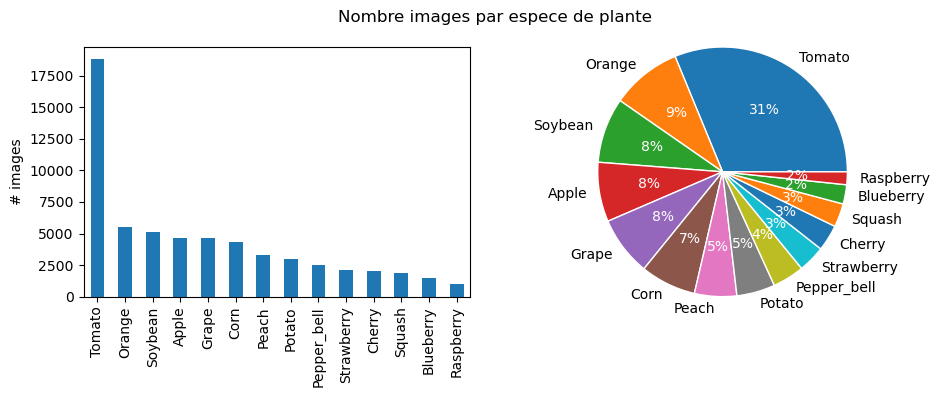

In [142]:
#
# relation species/label
#
doi = plantvillage[["label", "species"]]
disease_samples_per_species = doi.groupby("species").count()
disease_samples_per_species.sort_values("label", inplace=True, ascending=False)

FIGSIZE = (10, 4)

fig = plt.figure(figsize=FIGSIZE)
fig.suptitle("Nombre images par espece de plante")

ax = plt.subplot(121)
disease_samples_per_species.plot.bar(ax=ax,
                                     xlabel="",
                                     ylabel="# images",
                                     legend=False)

plt.subplot(122)
wedges, _, pcts = plt.pie(x=disease_samples_per_species.values.flatten(),
                     labels=disease_samples_per_species.index.values,
                     autopct='%.0f%%',
                     radius=1.25,
                     wedgeprops={'linewidth': 1.0, 
                                 'edgecolor': 'white'})
plt.setp(pcts, color='white')
# plt.setp(pcts[-5], distance=0.)

plt.tight_layout()
plt.show()

In [143]:
def load_image(filename):
    image = cv2.imread(filename)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

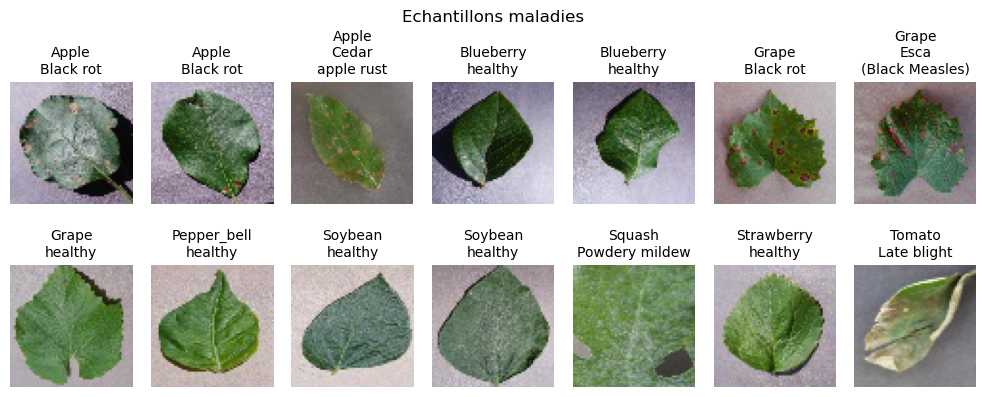

In [146]:
#
# visualize some images
#
SAMPLEs_GRID = (2, 7)

# select some random samples
sample_indices = random.sample(range(plantvillage.shape[0]), SAMPLEs_GRID[0] * SAMPLEs_GRID[1])
sample_indices.sort() 

samples = plantvillage.loc[sample_indices].copy()
samples["thumbnail"] = samples["thumbnail_path"].apply(load_image)

fig = plt.figure(figsize=FIGSIZE)
fig.suptitle("Echantillons maladies")

for i, (_, sample) in enumerate(samples.iterrows()):
    plt.subplot(SAMPLEs_GRID[0], SAMPLEs_GRID[1], i + 1)
    plt.axis("off")
    
    # adjust title: some disease have very long name
    species = sample['species']
    disease = sample['disease'].replace(species, "")
    disease = disease.split("_") 
    count = len(disease) 
    if count > 2:
        count //= 2
        disease0 = " ".join(disease[:count])
        disease1 = " ".join(disease[count:])
        disease = f"{disease0}\n{disease1}"
    else:
        disease = " ".join(disease)
    
    plt.title(f"{species}\n{disease}")    
    plt.imshow(sample["thumbnail"])
    plt.gca().title.set_size(10)

plt.tight_layout()
fig.subplots_adjust(hspace=0.5, top=0.8)
plt.show()

# Modelisation

Mettre un peu de bla bla pour justifier ce qu'on fait, citer les papiers et tout

**TODO**
* Train/test split
* Pipeline de traitement - Bag of Visual Words
    * Rescale en 256x256?
    * Remapper 0/1 et float
    * Threshold background/foreground    
    * Slicer les images
    * Detecter les features via SIFT/ORB
    * Passer dans un KMean
    * Mettre le tout dans notre dictionnaire

* Passer test data dans pipeline
    * Sparse vector pour une image non connue
    * Identifier avec K Nearest Neighboor

In [162]:
#
# split train/test
#
train, test = train_test_split(plantvillage, 
                               train_size=0.8, 
                               random_state=42, 
                               stratify=plantvillage["label"])

# validation split
display_html(f"<b>Dataset:</b> <font style='color:red;'>{plantvillage.size}</font>, "
             f"<b>Train:</b> <font style='color:red;'>{train.size}</font>, "
             f"<b>Test:</b> <font style='color:red;'>{test.size}</font> "
              "- 80% / 20% split")

# Evaluation

* Entrainement avec les stats